In [14]:
#importing the packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [3]:
! pip install -q scikit-plot

DEPRECATION: Python 2.7 will reach the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 won't be maintained after that date. A future version of pip will drop support for Python 2.7. More details about Python 2 support in pip, can be found at https://pip.pypa.io/en/latest/development/release-process/#python-2-support


In [ ]:
import scikitplot as skplt

In [4]:
#importing the required csv file

df = pd.read_csv('C:\\Users\\akash_vppt3ov\\Untitled Folder 7\iotdata.csv')
df.head()

,No.,Heart Rate,Respiration Rate,Body Temperature,Position,Risk,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,https://www.mottchildren.org/health-library/abo2987
0,1,105,30,36.1,1,0,NaN,NaN,NaN,NaN,NaN
1,2,120,28,36.5,0,1,NaN,NaN,NaN,NaN,NaN
2,3,90,40,35.8,1,1,NaN,NaN,NaN,NaN,NaN
3,4,110,35,36.9,1,0,NaN,NaN,NaN,NaN,NaN
4,5,130,24,35.4,0,1,NaN,NaN,NaN,NaN,NaN


In [5]:
#Dropping NA values

df=df.dropna(axis=1)
df.head(10)

,No.,Heart Rate,Respiration Rate,Body Temperature,Position,Risk
0,1,105,30,36.1,1,0
1,2,120,28,36.5,0,1
2,3,90,40,35.8,1,1
3,4,110,35,36.9,1,0
4,5,130,24,35.4,0,1
5,6,125,37,37.1,1,0
6,7,85,20,36.7,1,1
7,8,143,50,35.7,1,0
8,9,136,43,36.8,1,0
9,10,104,32,37.2,1,0


In [6]:
#Creating two dataframes. 
#X has the parameters used to make the decision
#Y has the decision/output

X = df.drop(['Risk'], axis=1)
y= df['Risk']
X.head()


,No.,Heart Rate,Respiration Rate,Body Temperature,Position
0,1,105,30,36.1,1
1,2,120,28,36.5,0
2,3,90,40,35.8,1
3,4,110,35,36.9,1
4,5,130,24,35.4,0


In [7]:
y.head()

0    0
1    1
2    1
3    0
4    1
Name: Risk, dtype: int64

In [41]:
#Creating the training and testing dataset to impose ML Algorithms

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,shuffle=False)

In [42]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression #import necessary libraries
classifier = LogisticRegression(max_iter=10000)
#training the classfier model with 80% of our dataset
classifier.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=10000, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [43]:
#Predciting using the trained model
y_pred=classifier.predict(X_test)

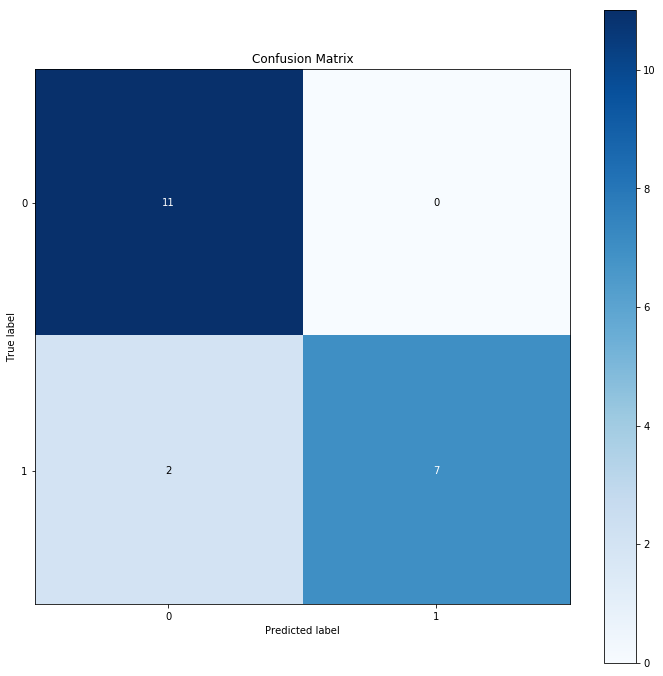

0.9


In [44]:
from sklearn.metrics import confusion_matrix,accuracy_score
#Confusion Matrix defines the parameters that the model predicted correctly and incorrectly
cm=confusion_matrix(y_test,y_pred)
#Determining Accuracy of the results
ac=accuracy_score(y_test,y_pred)


skplt.metrics.plot_confusion_matrix(
    y_test, 
    y_pred,
    figsize=(12,12))
plt.show()
print(ac)

In [45]:
#DecisionTreeClassifier

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
#Defining the model
classifier = DecisionTreeClassifier()
classifier.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [46]:
#Predicting based on the trained model
y_pred=classifier.predict(X_test)

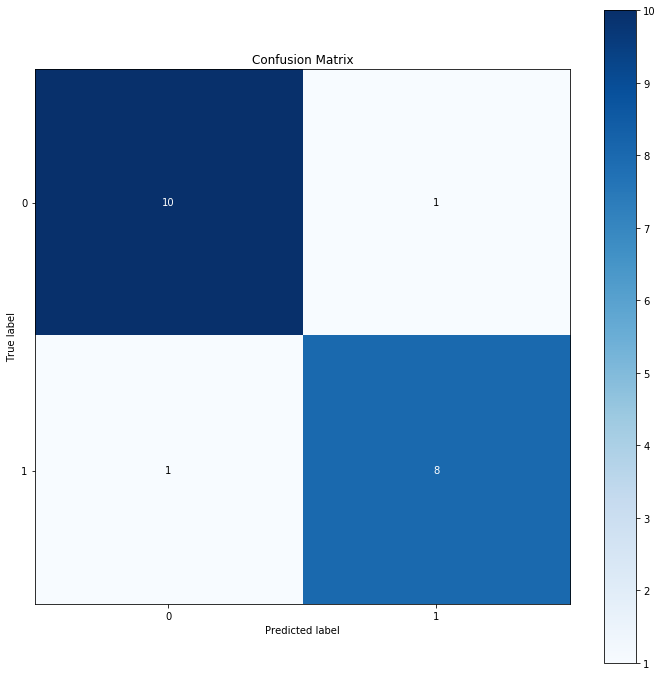

0.9


In [47]:
from sklearn.metrics import confusion_matrix,accuracy_score
#ConfusionMatrix
skplt.metrics.plot_confusion_matrix(
    y_test, 
    y_pred,
    figsize=(12,12))
plt.show()
#Accuracy
print(ac)